# Solving PDE with finite differences

## 1) Iterative solver


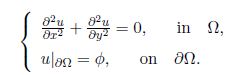

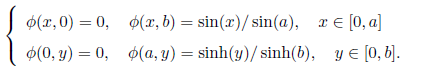

In [1]:
#imports
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
import plotly.plotly as py
import plotly.graph_objs as go
from numba import jit

In [2]:
#Boundary conditions
@jit
def Bcond(a, b, N, M, Xb = ['zer','ss'],Yb = ['zer','ssh']):
    
    X,Y = np.meshgrid(np.linspace(0,a,N),np.linspace(0,b,M))
    u = np.zeros([M,N])
    
    for i in range(2):
        if i == 0:
            index = 0
        else:
            index = M-1    
        if Xb[i] == 'ss':
            u[index,:] = np.sin(X[index,:])/np.sin(a)
        elif Xb[i] == 'ssh':
            u[index,:] = np.sinh(X[index,:])/np.sinh(a)
        elif Xb[i] == 'one':
            u[index,:] += 1
            
    for i in range(2):
        if i == 0:
            index = 0
        else:
            index = N-1    
        if Yb[i] == 'ss':
            u[:,index] = np.sin(Y[:,index])/np.sin(b)
        elif Yb[i] == 'ssh':
            u[:,index] = np.sinh(Y[:,index])/np.sinh(b)
        elif Yb[i] == 'one':
            u[:,index] += 1
    return u,X,Y

    

In [3]:
#MainF
@jit
def Solver(a,b,N,M,Xb = ['zer','ss'],Yb = ['zer','ssh'],iters = 100):
    u,X,Y = Bcond(a,b,N,M,Xb,Yb)
    Cc = ((X[0,1] - X[0,0])/(Y[1,0] - Y[0,0]))**2
    u_p = np.zeros_like(u)
    Err = np.zeros(iters)
    for Jc in range(iters):
        u_p[:] = u[:]
        for i in range(1, N-1):
            for j in range(1, M-1):
                u[j,i] = (Cc*(u_p[j-1,i]+u_p[j+1,i])+u_p[j,i-1]+u_p[j,i+1])/(2*(1+Cc))
    return u,X,Y

In [4]:
a = 40
b = 10
u,X,Y = Solver(a,b,101,101,iters = 1000)
u_ = (np.sin(X)*np.sinh(Y))/(np.sin(a)*np.sinh(b)) #AF


Text(0.5, 1.0, 'Error')

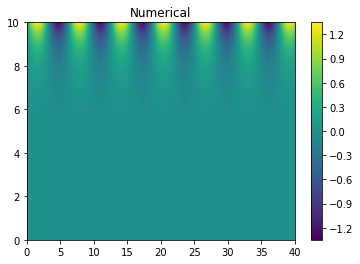

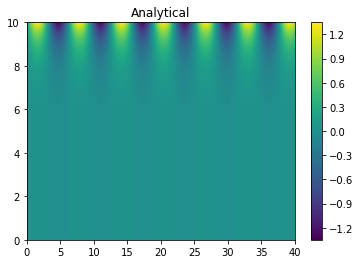

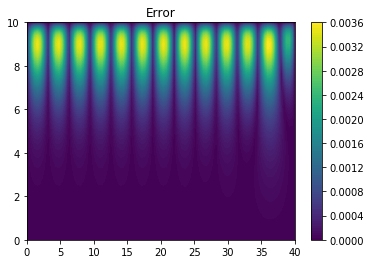

In [5]:
fig, ax = plt.subplots()
CS = ax.contourf(X, Y, u, 100)
cbar = fig.colorbar(CS)
plt.title('Numerical')

fig, ax = plt.subplots()
CS = ax.contourf(X, Y, u_, 100)
cbar = fig.colorbar(CS)
plt.title('Analytical')

fig, ax = plt.subplots()
Err = abs(u_-u)
CS = ax.contourf(X, Y, Err, 100)
cbar = fig.colorbar(CS)
plt.title('Error')

In [59]:
a = 1
b = 1

Mesh = np.arange(100,1000,200)
ErrMI = np.zeros_like(Mesh,dtype=np.double)

for i in range(np.size(Mesh)):
    u,X,Y = Solver(a,b,Mesh[i],Mesh[i],iters = 4*Mesh[i])
    u_ = (np.sin(X)*np.sinh(Y))/(np.sin(a)*np.sinh(b)) #AF
    ErrMI[i] = np.sqrt(np.mean((u-u_)**2))

Text(0, 0.5, 'Err')

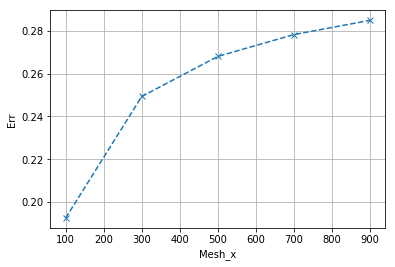

In [60]:
fig, ax = plt.subplots()
plt.plot(Mesh,ErrMI,'--x')
plt.grid()
plt.xlabel('Mesh_x')
plt.ylabel('Err')

Text(0, 0.5, 'Err')

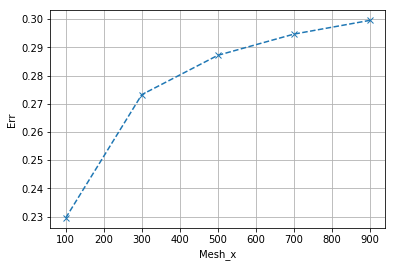

In [58]:
fig, ax = plt.subplots()
plt.plot(Mesh,ErrMI,'--x')
plt.grid()
plt.xlabel('Mesh_x')
plt.ylabel('Err')

In [35]:
u,X1,Y1 = Solver(a,b,201,101,iters = 1000)
u12,X12,Y12 = Solver(a,b,10,101,iters = 1000)
u16,X16,Y16 = Solver(a,b,15,101,iters = 1000)
u_ = (np.sin(X1)*np.sinh(Y1))/(np.sin(a)*np.sinh(b))



Text(0.5, 1.0, 'A')

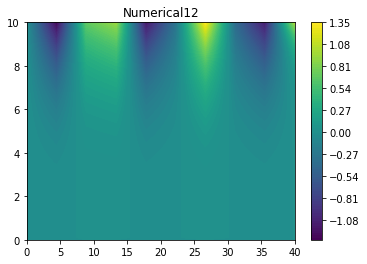

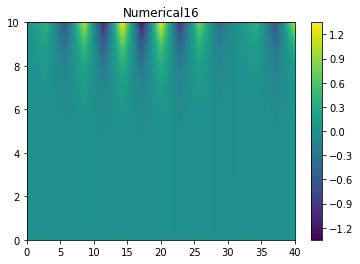

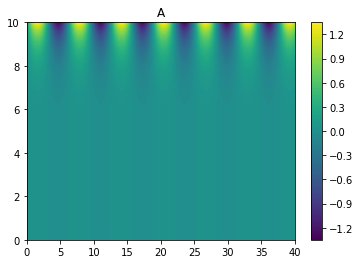

In [36]:
fig, ax = plt.subplots()
CS = ax.contourf(X12, Y12, u12, 100)
cbar = fig.colorbar(CS)
plt.title('Numerical12')
fig, ax = plt.subplots()
CS = ax.contourf(X16, Y16, u16, 100)
cbar = fig.colorbar(CS)
plt.title('Numerical16')
fig, ax = plt.subplots()
CS = ax.contourf(X1, Y1, u_, 100)
cbar = fig.colorbar(CS)
plt.title('A')

In [ ]:
mpl.rcParams['mathtext.fontset'] = 'cm'
mpl.rcParams['mathtext.rm'] = 'serif